# 🏡 House Prices Prediction: 01 - Initial Exploratory Data Analysis (EDA)

## 1.1. Project Objective and Data Source

The primary goal of this notebook is to begin the **Exploratory Data Analysis (EDA)** phase of the House Prices Advanced Regression Techniques competition from Kaggle. We aim to understand the structure, data types, and initial distribution of the target variable (`SalePrice`) to inform our cleaning and modeling strategy.

**Data Source:** Ames, Iowa Housing Data (Kaggle).

---

In [19]:
# Essential Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Style Configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default size for figures

# =================================================================
# Data Loading
# =================================================================
# Professional Note: The file path points directly to the 'raw/' directory
# to maintain traceability and immutability of the original data.
try:
    df_train = pd.read_csv('data/raw/train.csv')
    df_test = pd.read_csv('data/raw/test.csv')
    print("Data successfully loaded.")
except FileNotFoundError:
    print("Error: Ensure that 'train.csv' and 'test.csv' files are in the 'data/raw/' folder.")

# Set 'Id' as the index for both DataFrames
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

Data successfully loaded.


## 1.2. Environment Setup and Data Loading

This section imports all necessary libraries (Pandas, NumPy, Matplotlib, Seaborn) and configures the plotting environment. It loads the original, immutable `train.csv` and `test.csv` files from the `data/raw/` directory, a professional practice that ensures data integrity and traceability. The `Id` column is immediately set as the DataFrame index.

### Initial Data Check

We inspect the first five rows and verify the dimensions and data types of the loaded datasets.

In [20]:
# Show the first 5 rows of the training set
print("First rows of the training set (Train Data Head):\n")
print(df_train.head())

# Review dimensions and data types
print("\nDataFrame Information (Shape and Info):\n")
print(f"Train set rows and columns: {df_train.shape}")
print(f"Test set rows and columns: {df_test.shape}")

# Inspection of data types and non-null values
df_train.info()

First rows of the training set (Train Data Head):

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN     

## 1.3. Analysis of the Target Variable: `SalePrice`

A professional analysis begins with the target variable, as its properties often dictate the necessary pre-processing steps.

### Distribution Analysis

The histogram below shows the distribution of house prices.

**Observation:** The distribution is strongly **right-skewed** (positively skewed), as confirmed by the high Skewness value ($>1.0$).

**Decision for Pre-processing:** To satisfy the assumptions of linear models and improve model performance, the `SalePrice` variable will require a **logarithmic transformation** (e.g., $\log(1 + \text{SalePrice})$) in the data cleaning phase.

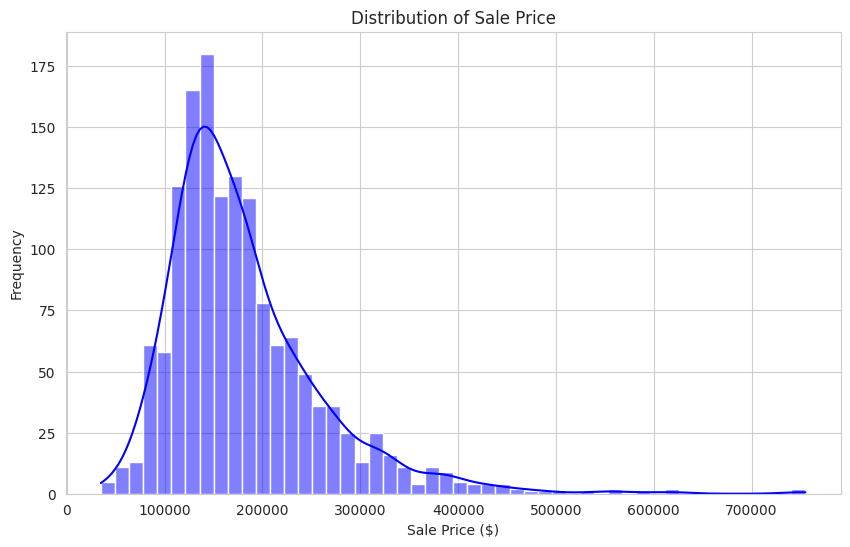


Target Variable Statistics:
Skewness: 1.8829
Kurtosis: 6.5363


In [21]:
# Distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True, bins=50, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

# Analysis of Skewness and Kurtosis
print("\nTarget Variable Statistics:")
print(f"Skewness: {df_train['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df_train['SalePrice'].kurt():.4f}")

Top 20 Features with Missing Values:
PoolQC         99.66
MiscFeature    96.40
Alley          93.22
Fence          80.44
MasVnrType     60.50
FireplaceQu    48.65
LotFrontage    16.65
GarageFinish    5.45
GarageQual      5.45
GarageCond      5.45
GarageYrBlt     5.45
GarageType      5.38
BsmtExposure    2.81
BsmtCond        2.81
BsmtQual        2.77
BsmtFinType2    2.74
BsmtFinType1    2.71
MasVnrArea      0.79
MSZoning        0.14
BsmtFullBath    0.07


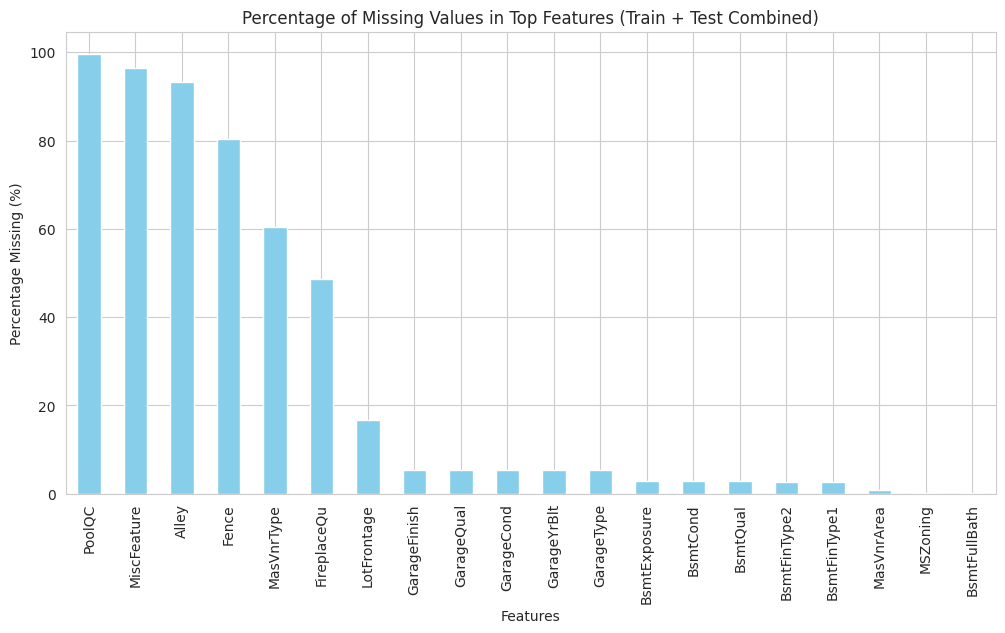

In [22]:
# =================================================================
# Missing Values Analysis
# =================================================================

# 1. Combine train and test sets to ensure consistency in missing value calculation
# We use the combined data for a comprehensive view, excluding the 'SalePrice' column for now.
df_combined = pd.concat([df_train.drop('SalePrice', axis=1), df_test], axis=0)

# 2. Calculate the total count of missing values per column
missing_counts = df_combined.isnull().sum()

# 3. Filter and sort columns that have at least one missing value
missing_data = missing_counts[missing_counts > 0].sort_values(ascending=False)

# 4. Calculate the percentage of missing values relative to the total number of rows
total_rows = len(df_combined)
missing_percentage = (missing_data / total_rows) * 100

# 5. Display the top missing features
print("Top 20 Features with Missing Values:")
print(missing_percentage.head(20).to_string(float_format="%.2f"))

# 6. Visualize the top missing features (professional visualization)
plt.figure(figsize=(12, 6))
missing_percentage.head(20).plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Top Features (Train + Test Combined)')
plt.xlabel('Features')
plt.ylabel('Percentage Missing (%)')
plt.show()

## 2.1. Missing Data Analysis and Strategy

Before modeling, it is essential to identify features with incomplete data. We combine the training and test sets to quantify missingness across the entire dataset, ensuring a consistent strategy for imputation.

### Key Observations:

1.  **High Missingness (Dropping):** Features like `PoolQC`, `MiscFeature`, `Alley`, and `Fence` have $> 80\%$ missing values. Given that their absence often means "None" or "Not Applicable" for the property, and the high rate of missingness, these may be candidates for removal or for a custom imputation strategy where `NaN` is treated as its own meaningful category.
2.  **Moderate Missingness (Imputation):** Features like `FireplaceQu`, `LotFrontage`, and garage-related features (`GarageType`, `GarageYrBlt`, etc.) have $\approx 5\%$ to $50\%$ missing data. These are often highly predictive, requiring careful imputation (e.g., using the median for numerical data or 'None' for categorical data).
3.  **Low Missingness:** Features with very few missing values (e.g., `MasVnrType`, `Electrical`) will be imputed using the mode (most frequent value) or the median/mean.

This analysis drives the **Data Cleaning and Feature Engineering** notebook (Notebook 02), where we will execute the imputation strategy systematically.